In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("pune_home_prices.xlsx")

In [3]:
df.head(3)

,Area,Bedroom,Age,Price
0,502,1,3,30
1,534,1,8,27
2,563,1,4,31


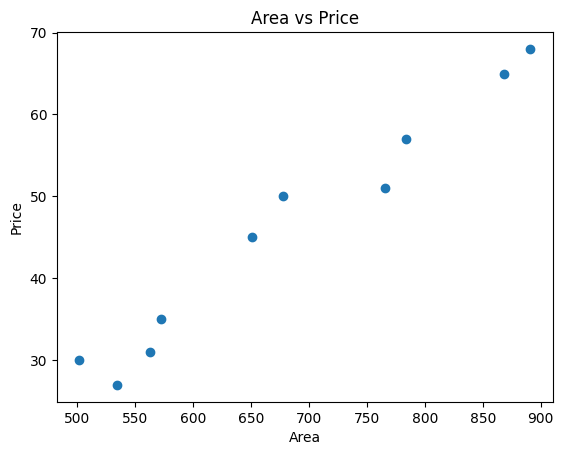

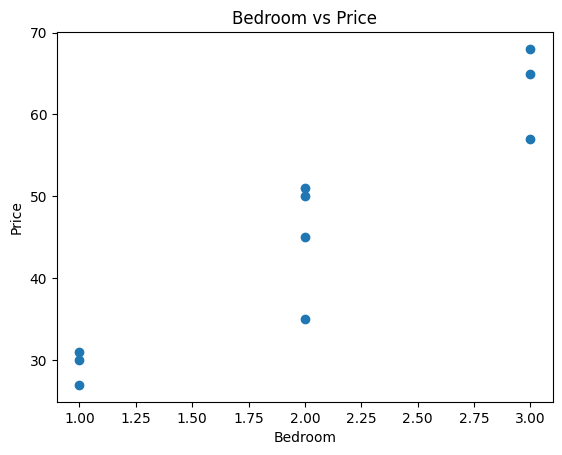

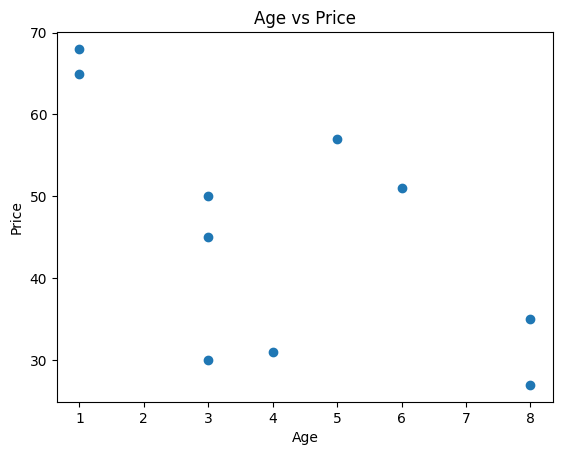

In [7]:
for i in df.columns[:3]:
    plt.scatter(df[i], df["Price"])
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.title("{} vs Price".format(i))
    plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
X = df.drop("Price", axis = 1)
y = df["Price"]

In [12]:
X.head(3)

,Area,Bedroom,Age
0,502,1,3
1,534,1,8
2,563,1,4


In [13]:
y.head(3)

0    30
1    27
2    31
Name: Price, dtype: int64

In [14]:
model = LinearRegression()

In [15]:
model.fit(X, y)

LinearRegression()

In [17]:
model.predict([[600, 2, 5]])

array([39.81594633])

In [18]:
c_area, c_bedroom, c_age = model.coef_[0],model.coef_[1],model.coef_[2]

In [19]:
print(c_area)
print(c_bedroom)
print(c_age)

0.06646342657215669
5.3644834533773205
-0.8839530744525117


In [20]:
model.coef_

array([ 0.06646343,  5.36448345, -0.88395307])

In [21]:
intercept = model.intercept_

In [25]:
price = c_area*600 + c_bedroom*2 + c_age*5 + intercept
print("Price for home with {}sqft area, {} bedroom and {} year old is {} lakh".format(600, 2, 5, price))

Price for home with 600sqft area, 2 bedroom and 5 year old is 39.81594633075051 lakh


In [27]:
y_pred = model.predict(X)

In [29]:
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
R2

0.9909206611755514

In [30]:
Adj_R2 = 1 - (((1-R2)*(len(y)-1))/(len(y)-(len(df.columns)-1)-1))
Adj_R2

0.9863809917633272